# Simulated annealing using optiomize.dual_annealing

The goal of simulated annealing is to maximize the performance of a model relative to a fitness function defined over the model parameters you are seeking to optimize. In Exercise 2, you will apply simulated annealing coded in scipy to a one-dimensional problem in which you seek the value of X that maximizes the output of a function called fitnessFunction. 

But first you must write code that implements the function, which is the product of m and n: 


$m = 1+ \cos(0.04v)^2$

$n = e ^ (−v2/(20000))$


Run the algorithm with an initial X value of 250 and an initial temperature of 10.
Plot the trajectory of the annealing algorithm along the fitness surface, Include the
graph in your lab report.

global minimum: xmin = [2.07497806e-07], f(xmin) = -2.000000


C:\Users\MCRIMI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


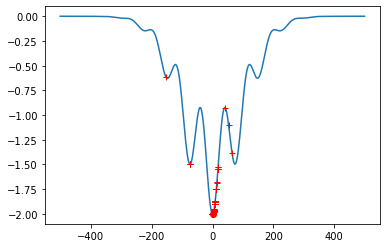

In [94]:
from scipy.optimize import dual_annealing
import math  
import numpy as np
import matplotlib.pyplot as plt

        
states=np.array([])
costs=np.array([])

def fitnessFunction(x):
    #Invert the function to transform into a minimization problem
    return -(1+math.cos (0.04 * x)**2) * (math.exp(-x**2/20000))

def callback(x, f, context):
    global states,costs
    #print (x)
    states= np.append(states,x)
    costs= np.append(costs,f)
        
lw = np.array([-500])
up = np.array([500])
ret = dual_annealing(fitnessFunction, bounds=list(zip(lw, up)),initial_temp=10, x0=np.array([250]) ,callback=callback, no_local_search=True)
print("global minimum: xmin = {0}, f(xmin) = {1:.6f}".format(ret.x, ret.fun))

rr = np.arange(lw, up, 1)
vfitnessFunction = np.vectorize(fitnessFunction)
x = plt.plot(rr, vfitnessFunction(rr))
ax = plt.subplot(1, 1,1)
ax.plot(states,costs, "r+")
ax.plot(ret.x,ret.fun, "ro")

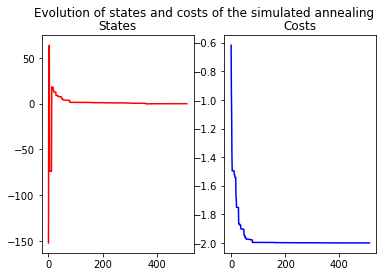

In [95]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()
    
see_annealing(states,costs)

Slowly increase the temperature until you find the peak about 90% of the time.
Report this temperature and explain its significance in terms of the relationship
between the search radius and the dimensions of the width of the fitness curve.

In [89]:
alg_iterations=10
g_iterations=1000
start_temp=10
j=0
success_rate=0
start_temp=1
step_temp=0.1

while success_rate < 0.9 and j < g_iterations:
    g_min_found=0
    success_rate=0
    states=np.array([])
    costs=np.array([])
    for i in range(1,alg_iterations):
        ret = dual_annealing(fitnessFunction, bounds=list(zip(lw, up)),initial_temp=start_temp, x0=np.array([250]),callback=callback, no_local_search=True)
        if ret.fun == -2: #global minimum has been found
            g_min_found= g_min_found + 1
    success_rate= g_min_found/alg_iterations     
    start_temp= start_temp + step_temp
    j=j+1

print("Initial T = 1 - Final T = {:.3g} - Iterations per temperature = {:.3g} - Global minima found (%): {:.3g} - j: {:.3g}".format((start_temp-step_temp), alg_iterations,success_rate,j))


Initial T = 1 -Final T = 7.1 - Iterations per temperature = 10 - Global minima found (%): 0.9 - j: 62


## Conclusion
Higher values of temperature to facilitates a wider search of the energy landscape at the begining (the material is more maleable to use the annealing terminology), allowing the optiomization to escape local minima that might be trapped in.